In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 

# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns
import vlc
import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)


Ruta actual de trabajo C:\Users\Practicas\OneDrive\Data_Science\Prediccion talleres\Operaciones


In [5]:
#sound=vlc.MediaPlayer(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()

In [2]:
#df = pd.read_csv (r'C:\\Users\Practicas\Documents\Prediccion talleres\data\taller_operaciones.csv',sep=';')
df = pd.read_csv (r'C:\Users\Practicas\OneDrive\Data_Science\Prediccion talleres\data\taller_operaciones.csv',sep=';')
df

,nomopera,ndias,v_codigbus,v_edad,ndias_ant,ndias_ant_area,ndias_ant_tipo,capacidad,marca,modelo,potencia,tipo,subtipo
0,Flexible escape,1.0,B117,6,1866.0,1866.0,1866.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
1,Cambio filtro retarde,2.0,U198,24,8471.0,8471.0,8471.0,73.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
2,Fuga refrigerante,2.0,U198,24,8471.0,8471.0,8471.0,73.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
3,Fuga refrigerante,2.0,B117,6,3.0,3.0,1869.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
4,Alternador,2.0,X110,2,703.0,703.0,703.0,16.0,FORD,TRANSIT,92.0,Discrecional,Microbus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49403,Fuga de aire,5225.0,B158,14,44.0,44.0,869.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal
49404,Fallo en AVS,6414.0,J266,17,1.0,1.0,814.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal
49405,Fuga refrigerante,1649.0,E652,4,4.0,4.0,70.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN
49406,Plataforma elevadora,5343.0,T252,14,7.0,7.0,7.0,27.0,IVECO,DIVO II INTERCITY,259.0,Discrecional,Normal


In [7]:
df = df.drop('ndias', 1)
df = df.drop('ndias_ant_area', 1)
df = df.drop('ndias_ant_tipo', 1)
#df.reset_index(drop = True, inplace = True)
df

,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
0,Flexible escape,B117,6,1866.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
1,Cambio filtro retarde,U198,24,8471.0,73.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
2,Fuga refrigerante,U198,24,8471.0,73.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
3,Fuga refrigerante,B117,6,3.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
4,Alternador,X110,2,703.0,16.0,FORD,TRANSIT,92.0,Discrecional,Microbus
...,...,...,...,...,...,...,...,...,...,...
49403,Fuga de aire,B158,14,44.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal
49404,Fallo en AVS,J266,17,1.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal
49405,Fuga refrigerante,E652,4,4.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN
49406,Plataforma elevadora,T252,14,7.0,27.0,IVECO,DIVO II INTERCITY,259.0,Discrecional,Normal


In [8]:
#indexNames = df[ (df['ndias_ant'] > 150)
                #& (df['ndias_ant'] <= 0) ].index
#df=df.drop(df[ (df['ndias_ant'] > 150)& (df['ndias_ant'] <= 0) ].index, inplace=True)
df_drop=df[df['ndias_ant']>150].index
df=df.drop(df_drop)
df_drop=df[df['ndias_ant']<=0].index
df=df.drop(df_drop)
df=df.reset_index(drop = True)
df

,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
0,Fuga refrigerante,B117,6,3.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
1,Frenos 1º eje,T227,4,3.0,38.0,MERCEDES BENZ,TOURING,310.0,Discrecional,Normal
2,Regular ralenti,U205,22,9.0,81.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
3,Cambio filtro retarde,B117,6,5.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
4,Inyectores,U208,24,22.0,71.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
...,...,...,...,...,...,...,...,...,...,...
45947,Fuga de aire,B158,14,44.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal
45948,Fallo en AVS,J266,17,1.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal
45949,Fuga refrigerante,E652,4,4.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN
45950,Plataforma elevadora,T252,14,7.0,27.0,IVECO,DIVO II INTERCITY,259.0,Discrecional,Normal


In [9]:
df

,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
0,Fuga refrigerante,B117,6,3.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
1,Frenos 1º eje,T227,4,3.0,38.0,MERCEDES BENZ,TOURING,310.0,Discrecional,Normal
2,Regular ralenti,U205,22,9.0,81.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
3,Cambio filtro retarde,B117,6,5.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal
4,Inyectores,U208,24,22.0,71.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia
...,...,...,...,...,...,...,...,...,...,...
45947,Fuga de aire,B158,14,44.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal
45948,Fallo en AVS,J266,17,1.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal
45949,Fuga refrigerante,E652,4,4.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN
45950,Plataforma elevadora,T252,14,7.0,27.0,IVECO,DIVO II INTERCITY,259.0,Discrecional,Normal


# AGRUPAMOS

## SISTEMA DE REFRIGERACIÓN

In [10]:
df['grupopera'] = np.where(
                        (df['nomopera'].str.contains('Bomba agua'))|
                        (df['nomopera'].str.contains('Intercooler'))|
                        (df['nomopera'].str.contains('Manguito/s calefaccion'))|
                        (df['nomopera'].str.contains('Manguito/s motor'))|
                        (df['nomopera'].str.contains('Radiador'))|  
                        (df['nomopera'].str.contains('Termostatos'))| 
                        (df['nomopera'].str.contains('Fuga refrigerante'))| 
                        (df['nomopera'].str.contains('Presion en circuito refrigeracion'))
                         ,'Sistema refrigreración',np.nan)

## SISTEMA DE DIRECION

In [11]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Caja direccion'))|
                           (df['nomopera'].str.contains('Fuga aceite servodireccion'))|
                           (df['nomopera'].str.contains('Rotulas direccion'))|
                           (df['nomopera'].str.contains('Alineado de direccion'))|
                           (df['nomopera'].str.contains('Timoneria direccion'))
                           ,'Sistema dirección',df['grupopera'])

## SISTEMA FRENOS

In [12]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Frenos 1º eje'))|
                           (df['nomopera'].str.contains('Frenos 2º eje'))|
                           (df['nomopera'].str.contains('Frenos 3º eje'))|
                           (df['nomopera'].str.contains('Freno mano'))|
                           (df['nomopera'].str.contains('Disco'))|
                           (df['nomopera'].str.contains('Bomba freno'))
                           ,'Sistema frenos',df['grupopera'])

## SISTEMA DE ESCAPE

In [13]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Flexible escape'))|
                           (df['nomopera'].str.contains('Fuga escape'))|
                           (df['nomopera'].str.contains('Catalizador'))|
                           (df['nomopera'].str.contains('Silencioso'))
                           ,'Sistema de escape',df['grupopera'])

In [14]:
## SISTEMA AMORTIGUACIÓN

In [15]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Regular suspension'))|
                           (df['nomopera'].str.contains('Amortiguador 2º eje derecho'))|
                           (df['nomopera'].str.contains('Amortiguadores 2º eje'))|
                           (df['nomopera'].str.contains('Amortiguadores 3º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 1º eje'))|
                           (df['nomopera'].str.contains('Tirantes/silembrocs 2º eje'))
                           ,'Sistema de amortiguación',df['grupopera'])

## SISTEMA DE ALIMENTACIÓN

In [16]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Inyectores'))|
                           (df['nomopera'].str.contains('Reglaje inyectores'))
                           ,'Sistema de alimentación',df['grupopera'])

## MOTOR

In [17]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Cambiar turbina/motor condensadora'))|
                           (df['nomopera'].str.contains('Culata del compresor del motor'))|
                           (df['nomopera'].str.contains('Fuga aceite motor'))|
                           (df['nomopera'].str.contains('Limpiar motor'))|
                           (df['nomopera'].str.contains('Motor'))|
                           (df['nomopera'].str.contains('Poleas motor'))|
                           (df['nomopera'].str.contains('Reten trasero motor'))|
                           (df['nomopera'].str.contains('Ruido en motor'))|
                           (df['nomopera'].str.contains('Arbol de levas'))|
                           (df['nomopera'].str.contains('Casquillos de biela'))|
                           (df['nomopera'].str.contains('Potencia motor'))|
                           (df['nomopera'].str.contains('Turbo'))|
                           (df['nomopera'].str.contains('Manguito/s admision'))|
                           (df['nomopera'].str.contains('Tacos motor'))
                           ,'Motor',df['grupopera'])

## Precalentador

In [18]:
df['grupopera'] = np.where((df['nomopera'].str.contains('recalentador'))
                           ,'Precalentador',df['grupopera'])

## Alternador

In [19]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Alternador'))|
                           #(df['nomopera'].str.contains('Soporte alternador'))|
                           (df['nomopera'].str.contains('Alternador auxiliar'))
                           ,'Alternador',df['grupopera'])

## ABS/EBS

In [20]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo en ABS/EBS'))
                           ,'ABS/EBS',df['grupopera'])

## ADBLUE

In [21]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fallo adblue'))|
                           (df['nomopera'].str.contains('Fuga adblue'))
                           ,'Adblue',df['grupopera'])

## BATERIAS

In [22]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Baterias'))|
                           (df['nomopera'].str.contains('Carga de baterias'))
                           ,'Baterias',df['grupopera'])

## CORREAS

In [23]:
df['grupopera'] = np.where((df['nomopera'].str.contains('orrea'))
                           ,'Correas',df['grupopera'])

## Reglaje de Válvulas

In [24]:
df['grupopera'] = np.where((df['nomopera'].str.contains('valvula'))
                           ,'Reglaje válvulas',df['grupopera'])

## Filtro Particulas

In [25]:
df['grupopera'] = np.where((df['nomopera'].str.contains('iltro part'))
                           ,'Filtro de Particulas',df['grupopera'])

## EDC

In [26]:
df['grupopera'] = np.where((df['nomopera'].str.contains('EDC'))
                           ,'Fallo en EDC',df['grupopera'])

## Fuga de Aire

In [27]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuga de aire'))
                           ,'Fuga de aire',df['grupopera'])

## TURBINA MOTOR

In [28]:
df['grupopera'] = np.where((df['nomopera'].str.contains('turbina'))
                           ,'Cambiar turbina/motor condensadora',df['grupopera'])

## GASOIL

In [29]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Deposito de gasoil'))|
                           #(df['nomopera'].str.contains('Cambio filtro gasoil'))|
                           (df['nomopera'].str.contains('Fuga gasoil'))
                           ,'Gasoil',df['grupopera'])

## Fallo en AVS

In [30]:
df['grupopera'] = np.where((df['nomopera'].str.contains('AVS'))
                           ,'Fallo en AVS',df['grupopera'])

## Fuelle

In [31]:
df['grupopera'] = np.where((df['nomopera'].str.contains('Fuelle 1º eje derecho'))|
                           (df['nomopera'].str.contains('Fuelle 1º eje izquierdo'))|
                           (df['nomopera'].str.contains('Fuelles 2º eje'))|
                           (df['nomopera'].str.contains('Fuelles1º eje'))
                           ,'Fuelle',df['grupopera'])

## Pinchazo

In [32]:
df['grupopera'] = np.where((df['nomopera'].str.contains('pinchazo'))
                           ,'Pinchazo',df['grupopera'])

#### Eliminación de  operaciones no agrupadas

In [33]:
df=df[~df['grupopera'].str.contains("nan")]
df.groupby(['grupopera']).count()

,nomopera,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo
grupopera,,,,,,,,,,
ABS/EBS,262,262,262,262,260,262,262,226,261,247
Adblue,178,178,178,178,177,178,178,177,178,178
Alternador,722,722,722,722,718,722,721,586,715,695
Baterias,823,823,823,823,812,823,821,648,817,768
Cambiar turbina/motor condensadora,517,517,517,517,516,517,517,428,517,515
Correas,2294,2294,2294,2294,2280,2294,2290,1917,2280,2242
Fallo en AVS,245,245,245,245,245,245,245,201,245,241
Fallo en EDC,903,903,903,903,892,903,903,781,901,843
Filtro de Particulas,156,156,156,156,153,156,156,121,155,132


In [34]:
df = df.drop('nomopera', 1)
df

,v_codigbus,v_edad,ndias_ant,capacidad,marca,modelo,potencia,tipo,subtipo,grupopera
0,B117,6,3.0,74.0,MAN,TOURING INTERCITY,228.0,Interurbano,Normal,Sistema refrigreración
1,T227,4,3.0,38.0,MERCEDES BENZ,TOURING,310.0,Discrecional,Normal,Sistema frenos
4,U208,24,22.0,71.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia,Sistema de alimentación
6,H086,1,18.0,100.0,SCANIA,CS40 CITY II,191.0,Urbano,Normal,Baterias
8,U238,25,12.0,81.0,MAN,SIN ASIGNAR,NaN,BUS TURISTICO,Turistic Valencia,Correas
...,...,...,...,...,...,...,...,...,...,...
45946,C099,7,147.0,71.0,MAN,i6 13.37,353.0,Discrecional,Normal,Sistema frenos
45947,B158,14,44.0,53.0,MAN,LION'S COACH,324.0,Discrecional,Normal,Fuga de aire
45948,J266,17,1.0,55.0,SCANIA,ATLANTIS,280.0,Discrecional,Normal,Fallo en AVS
45949,E652,4,4.0,5.0,FORD,MONDEO BA7,NaN,TURISMO,NaN,Sistema refrigreración


In [35]:
df.shape

(18298, 10)

In [36]:
df= df[['grupopera','marca','modelo','v_codigbus','tipo','v_edad','capacidad','ndias_ant','subtipo','potencia']]
df

,grupopera,marca,modelo,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia
0,Sistema refrigreración,MAN,TOURING INTERCITY,B117,Interurbano,6,74.0,3.0,Normal,228.0
1,Sistema frenos,MERCEDES BENZ,TOURING,T227,Discrecional,4,38.0,3.0,Normal,310.0
4,Sistema de alimentación,MAN,SIN ASIGNAR,U208,BUS TURISTICO,24,71.0,22.0,Turistic Valencia,NaN
6,Baterias,SCANIA,CS40 CITY II,H086,Urbano,1,100.0,18.0,Normal,191.0
8,Correas,MAN,SIN ASIGNAR,U238,BUS TURISTICO,25,81.0,12.0,Turistic Valencia,NaN
...,...,...,...,...,...,...,...,...,...,...
45946,Sistema frenos,MAN,i6 13.37,C099,Discrecional,7,71.0,147.0,Normal,353.0
45947,Fuga de aire,MAN,LION'S COACH,B158,Discrecional,14,53.0,44.0,Normal,324.0
45948,Fallo en AVS,SCANIA,ATLANTIS,J266,Discrecional,17,55.0,1.0,Normal,280.0
45949,Sistema refrigreración,FORD,MONDEO BA7,E652,TURISMO,4,5.0,4.0,NaN,NaN


# Sistema de escape

In [37]:
target='Sistema de escape'
df['target'] = np.where((df['grupopera'].str.contains(target)),1,0)
df

C:\Users\PRACTI~1\AppData\Local\Temp/ipykernel_10308/427214997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.where((df['grupopera'].str.contains(target)),1,0)


,grupopera,marca,modelo,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia,target
0,Sistema refrigreración,MAN,TOURING INTERCITY,B117,Interurbano,6,74.0,3.0,Normal,228.0,0
1,Sistema frenos,MERCEDES BENZ,TOURING,T227,Discrecional,4,38.0,3.0,Normal,310.0,0
4,Sistema de alimentación,MAN,SIN ASIGNAR,U208,BUS TURISTICO,24,71.0,22.0,Turistic Valencia,NaN,0
6,Baterias,SCANIA,CS40 CITY II,H086,Urbano,1,100.0,18.0,Normal,191.0,0
8,Correas,MAN,SIN ASIGNAR,U238,BUS TURISTICO,25,81.0,12.0,Turistic Valencia,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
45946,Sistema frenos,MAN,i6 13.37,C099,Discrecional,7,71.0,147.0,Normal,353.0,0
45947,Fuga de aire,MAN,LION'S COACH,B158,Discrecional,14,53.0,44.0,Normal,324.0,0
45948,Fallo en AVS,SCANIA,ATLANTIS,J266,Discrecional,17,55.0,1.0,Normal,280.0,0
45949,Sistema refrigreración,FORD,MONDEO BA7,E652,TURISMO,4,5.0,4.0,NaN,NaN,0


In [38]:
df =df.dropna()
df.reset_index(drop = True, inplace = True)

In [39]:
df

,grupopera,marca,modelo,v_codigbus,tipo,v_edad,capacidad,ndias_ant,subtipo,potencia,target
0,Sistema refrigreración,MAN,TOURING INTERCITY,B117,Interurbano,6,74.0,3.0,Normal,228.0,0
1,Sistema frenos,MERCEDES BENZ,TOURING,T227,Discrecional,4,38.0,3.0,Normal,310.0,0
2,Baterias,SCANIA,CS40 CITY II,H086,Urbano,1,100.0,18.0,Normal,191.0,0
3,Sistema frenos,MAN,DIVO II,B129,Discrecional,1,55.0,21.0,Normal,338.0,0
4,Sistema frenos,MAN,DIVO II,B129,Discrecional,1,55.0,21.0,Normal,338.0,0
...,...,...,...,...,...,...,...,...,...,...,...
14535,Sistema frenos,MERCEDES BENZ,DIVO I INTERCITY,H087,Discrecional,15,29.0,2.0,Normal,220.0,0
14536,Sistema frenos,MAN,i6 13.37,C099,Discrecional,7,71.0,147.0,Normal,353.0,0
14537,Sistema frenos,MAN,i6 13.37,C099,Discrecional,7,71.0,147.0,Normal,353.0,0
14538,Fuga de aire,MAN,LION'S COACH,B158,Discrecional,14,53.0,44.0,Normal,324.0,0


In [40]:
import category_encoders as ce
df_cat=df.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['marca','tipo','modelo','v_codigbus','subtipo'])
df_enc = encoder.fit_transform(df_cat)
df_enc

C:\Users\Practicas\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,grupopera,marca,modelo,v_codigbus,tipo,v_edad,subtipo
0,Sistema refrigreración,1,1,1,1,6,1
1,Sistema frenos,2,2,2,2,4,1
2,Baterias,3,3,3,3,1,1
3,Sistema frenos,1,4,4,2,1,1
4,Sistema frenos,1,4,4,2,1,1
...,...,...,...,...,...,...,...
14535,Sistema frenos,2,14,23,2,15,1
14536,Sistema frenos,1,41,78,2,7,1
14537,Sistema frenos,1,41,78,2,7,1
14538,Fuga de aire,1,21,85,2,14,1


In [41]:
df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)

In [42]:
df_num

,capacidad,ndias_ant,potencia,target
0,74.0,3.0,228.0,0
1,38.0,3.0,310.0,0
2,100.0,18.0,191.0,0
3,55.0,21.0,338.0,0
4,55.0,21.0,338.0,0
...,...,...,...,...
14535,29.0,2.0,220.0,0
14536,71.0,147.0,353.0,0
14537,71.0,147.0,353.0,0
14538,53.0,44.0,324.0,0


In [43]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(14540, 11)

In [44]:
df_norm

,grupopera,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target
0,Sistema refrigreración,1,1,1,1,6,1,0.436709,0.013514,0.557047,0.0
1,Sistema frenos,2,2,2,2,4,1,0.208861,0.013514,0.832215,0.0
2,Baterias,3,3,3,3,1,1,0.601266,0.114865,0.432886,0.0
3,Sistema frenos,1,4,4,2,1,1,0.316456,0.135135,0.926174,0.0
4,Sistema frenos,1,4,4,2,1,1,0.316456,0.135135,0.926174,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14535,Sistema frenos,2,14,23,2,15,1,0.151899,0.006757,0.530201,0.0
14536,Sistema frenos,1,41,78,2,7,1,0.417722,0.986486,0.976510,0.0
14537,Sistema frenos,1,41,78,2,7,1,0.417722,0.986486,0.976510,0.0
14538,Fuga de aire,1,21,85,2,14,1,0.303797,0.290541,0.879195,0.0


In [45]:
df_norm = df_norm.drop('grupopera', 1)
df_norm

,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target
0,1,1,1,1,6,1,0.436709,0.013514,0.557047,0.0
1,2,2,2,2,4,1,0.208861,0.013514,0.832215,0.0
2,3,3,3,3,1,1,0.601266,0.114865,0.432886,0.0
3,1,4,4,2,1,1,0.316456,0.135135,0.926174,0.0
4,1,4,4,2,1,1,0.316456,0.135135,0.926174,0.0
...,...,...,...,...,...,...,...,...,...,...
14535,2,14,23,2,15,1,0.151899,0.006757,0.530201,0.0
14536,1,41,78,2,7,1,0.417722,0.986486,0.976510,0.0
14537,1,41,78,2,7,1,0.417722,0.986486,0.976510,0.0
14538,1,21,85,2,14,1,0.303797,0.290541,0.879195,0.0


In [46]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,B117,1
1,T227,2
2,H086,3
3,B129,4
4,H076,5
...,...,...
338,82HC,339
339,F193,340
340,63HC,341
341,THP0313,342


In [47]:
df_marca = pd.DataFrame({'Marca':pd.unique(df.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,MAN,1
1,MERCEDES BENZ,2
2,SCANIA,3
3,FORD,4
4,VOLVO,5
5,IVECO,6
6,RENAULT,7
7,DAF,8
8,CUMMINS,9
9,IVECO/FIAT,10


In [48]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

,modelo,codigo
0,TOURING INTERCITY,1
1,TOURING,2
2,CS40 CITY II,3
3,DIVO II,4
4,CENTURY,5
...,...,...
86,TRANSIT TOURNEO,87
87,FUTURA,88
88,DYPARRO,89
89,SUNRISE,90


In [49]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Interurbano,1
1,Discrecional,2
2,Urbano,3
3,Turismo,4


In [50]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Normal,1
1,Microbus,2
2,Midibus,3
3,Doble Piso,4
4,VTC,5
5,Articulado,6


In [51]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo

,modelo,codigo
0,TOURING INTERCITY,1
1,TOURING,2
2,CS40 CITY II,3
3,DIVO II,4
4,CENTURY,5
...,...,...
86,TRANSIT TOURNEO,87
87,FUTURA,88
88,DYPARRO,89
89,SUNRISE,90


In [52]:
df_target1=df_norm[df['target']==1]
df_target0=df_norm[df['target']==0]

In [53]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
                                        #df_target0.drop(columns = "target"),
                                        df_target0,
                                        df_target0['target'],
                                        test_size=0.985,
                                        random_state = 123
                                    )

In [54]:
X_train_t

,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target
8988,1,1,5,1,18,1,0.436709,0.094595,0.557047,0.0
10850,9,79,241,2,5,1,0.291139,0.040541,0.630872,0.0
5715,3,8,60,3,9,3,0.386076,0.081081,0.359060,0.0
9235,3,40,99,2,3,1,0.417722,0.040541,1.000000,0.0
8221,2,30,48,2,8,2,0.018987,0.006757,0.194631,0.0
...,...,...,...,...,...,...,...,...,...,...
5275,1,47,100,2,0,1,0.316456,0.027027,0.879195,0.0
12415,3,5,7,2,15,1,0.316456,0.000000,0.731544,0.0
1357,5,8,11,3,7,1,0.170886,0.027027,0.630872,0.0
11806,5,45,95,2,15,1,0.316456,0.331081,0.828859,0.0


In [55]:
df_norm = pd.concat([df_target1,X_train_t])
df_norm.reset_index(drop = True, inplace = True)
df_norm['target']. value_counts ()

0.0    215
1.0    182
Name: target, dtype: int64

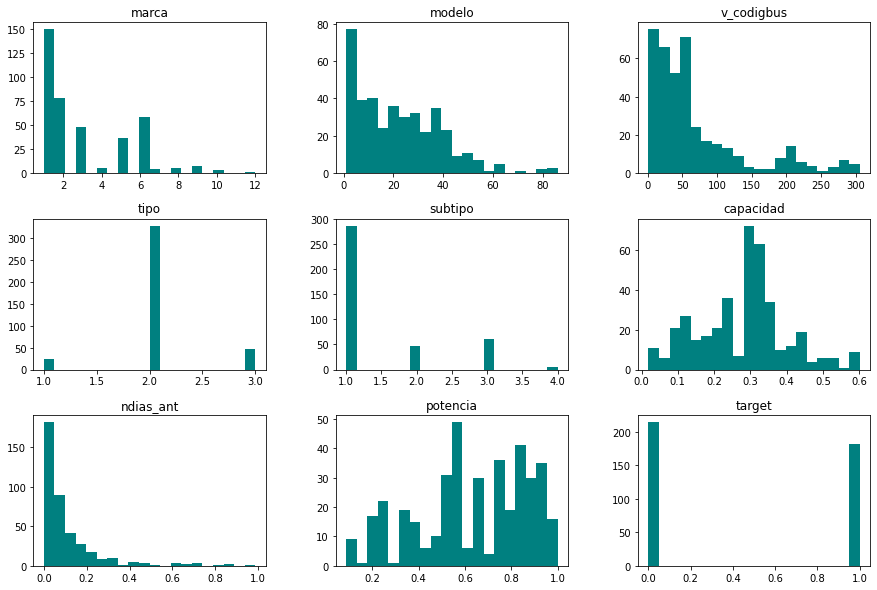

In [56]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

Text(0.5, 0, 'Cantidad de observaciones')

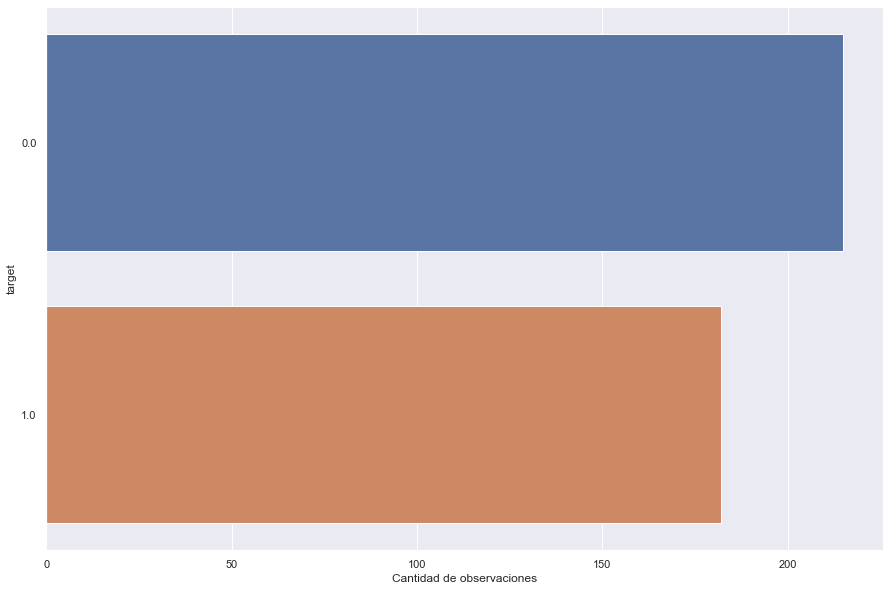

In [57]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y="target",data=df_norm)

plt.xlabel('Cantidad de observaciones') 

In [58]:
df_norm['target']. value_counts ()

0.0    215
1.0    182
Name: target, dtype: int64

In [59]:
df.ndias_ant.describe()

count    14540.000000
mean        17.459904
std         20.462584
min          1.000000
25%          5.000000
50%         10.000000
75%         22.000000
max        149.000000
Name: ndias_ant, dtype: float64

In [60]:
df.describe()

,capacidad,ndias_ant,potencia,target
count,14540.000000,14540.000000,14540.000000,14540.000000
mean,50.947455,17.459904,258.944979,0.012517
std,19.003335,20.462584,71.162770,0.111182
min,5.000000,1.000000,62.000000,0.000000
25%,40.000000,5.000000,220.000000,0.000000
50%,54.000000,10.000000,279.000000,0.000000
75%,59.000000,22.000000,317.000000,0.000000
max,163.000000,149.000000,360.000000,1.000000


<AxesSubplot:xlabel='repetitividad', ylabel='Nº de días'>

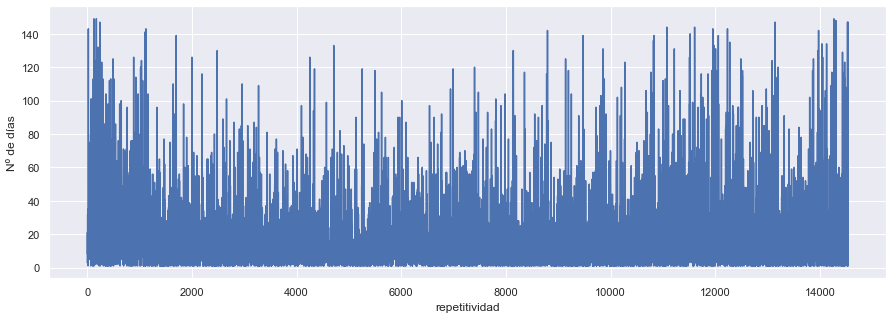

In [61]:
plt.figure(figsize=(15,5))
plt.xlabel('repetitividad')
#plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Nº de días')
df.ndias_ant.plot()

In [62]:
fs1 = FeatureSelector(data = df_norm, labels = df_enc.columns)
fs1.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



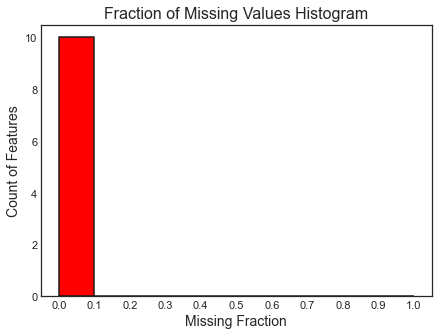

In [63]:
fs1.plot_missing()

In [64]:
round(df.isna().sum() * 100 / len(df),2)

grupopera     0.0
marca         0.0
modelo        0.0
v_codigbus    0.0
tipo          0.0
v_edad        0.0
capacidad     0.0
ndias_ant     0.0
subtipo       0.0
potencia      0.0
target        0.0
dtype: float64

In [65]:
fs1.identify_collinear(correlation_threshold=0.8)

0 features with a correlation magnitude greater than 0.80.



In [66]:
collinear_features = fs1.ops['collinear']
collinear=fs1.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'marca'),
  Text(0, 1.5, 'modelo'),
  Text(0, 2.5, 'v_codigbus'),
  Text(0, 3.5, 'tipo'),
  Text(0, 4.5, 'subtipo'),
  Text(0, 5.5, 'capacidad'),
  Text(0, 6.5, 'ndias_ant'),
  Text(0, 7.5, 'potencia'),
  Text(0, 8.5, 'target')])

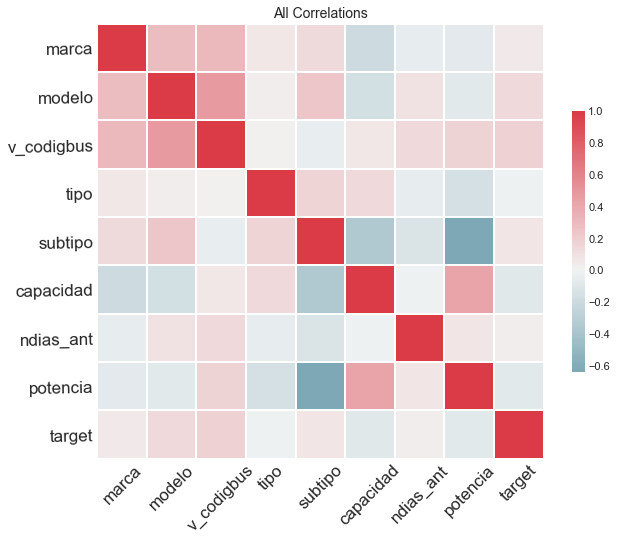

In [67]:
fs1.plot_collinear(plot_all=True)
plt.xticks(rotation=45)
plt.yticks(rotation=1)

<AxesSubplot:>

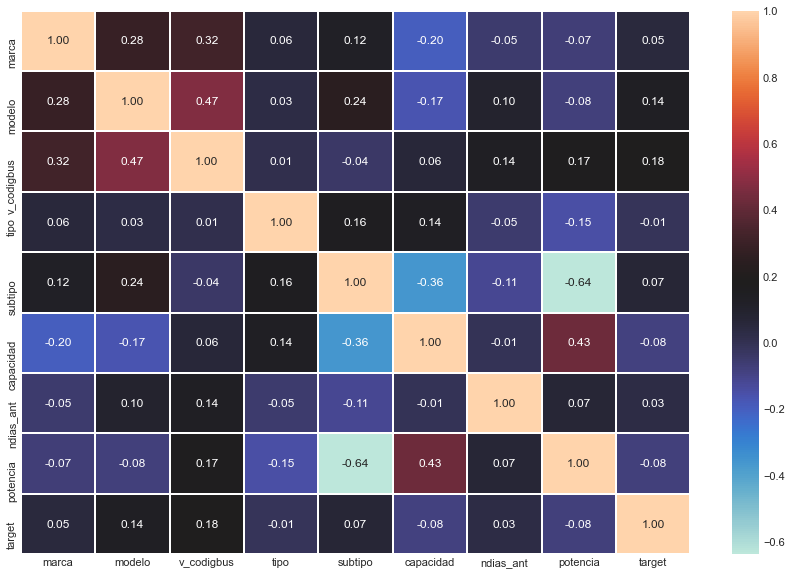

In [68]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

# Análisis de componentes principales

In [69]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

In [70]:
df_feat.index

Index(['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo',
       'capacidad', 'ndias_ant', 'potencia'],
      dtype='object')

In [71]:
names =  df_feat.index

names

Index(['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo',
       'capacidad', 'ndias_ant', 'potencia'],
      dtype='object')

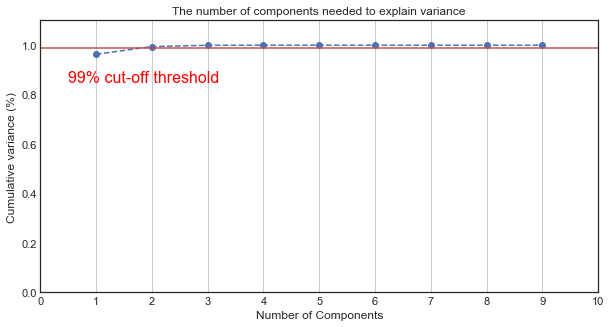

In [72]:

from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.83760518 0.1223442 ]


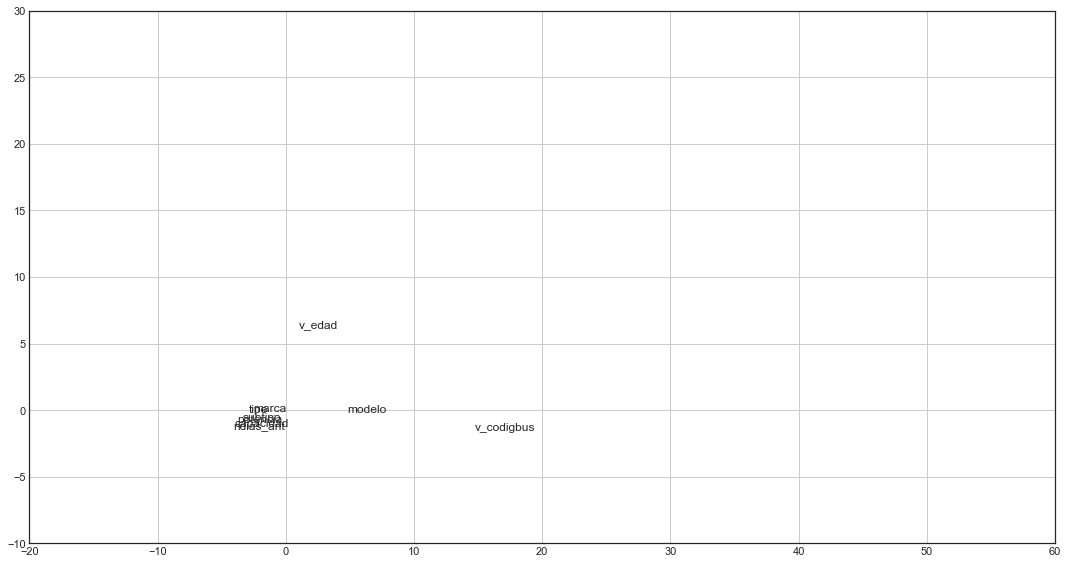

In [73]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, 60)
plt.ylim(-10, 30)
ax.grid(True)
fig.tight_layout()
plt.show()

# Clustering jerárquico

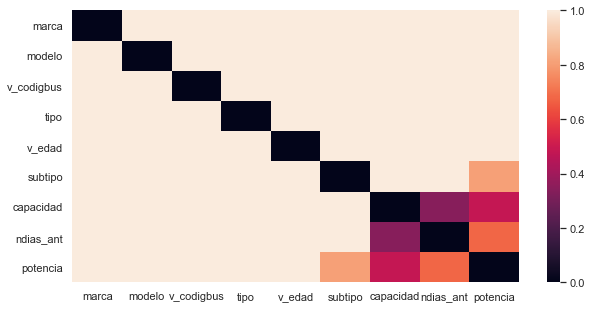

In [74]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

C:\Users\PRACTI~1\AppData\Local\Temp/ipykernel_10308/3450793101.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


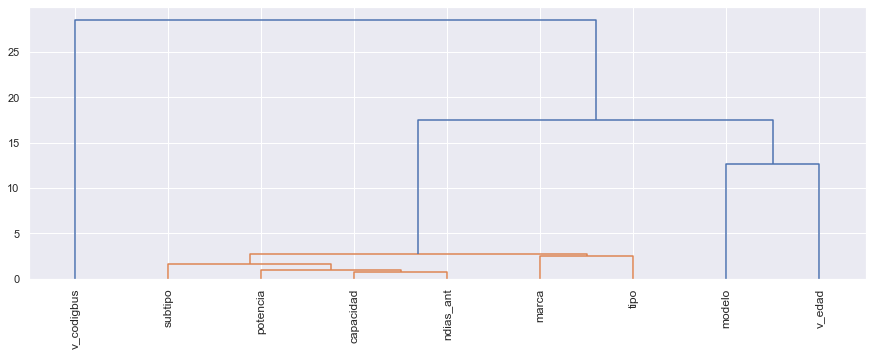

In [75]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 8, labels = names , leaf_rotation=90)
plt.show()

In [76]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# clusters = cluster.hierarchy.linkage(matdist, method = 'ward')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# plt.figure(figsize=(15,5))
# cluster.hierarchy.dendrogram(clusters, color_threshold = 20, labels = names , leaf_rotation=90)
# plt.show()

In [77]:
cut = 8 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([1, 2, 4, 1, 3, 1, 1, 1, 1], dtype=int32)

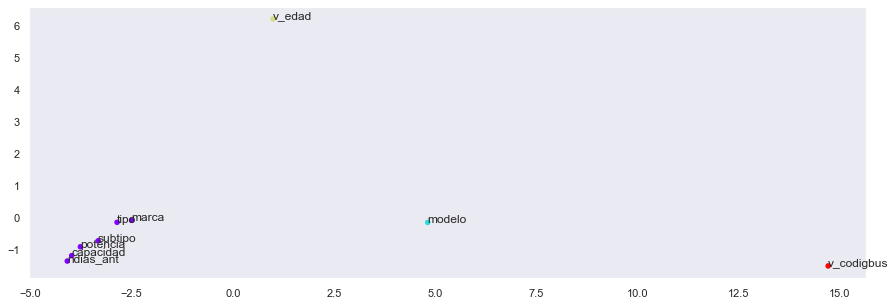

In [78]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.grid()
plt.show()

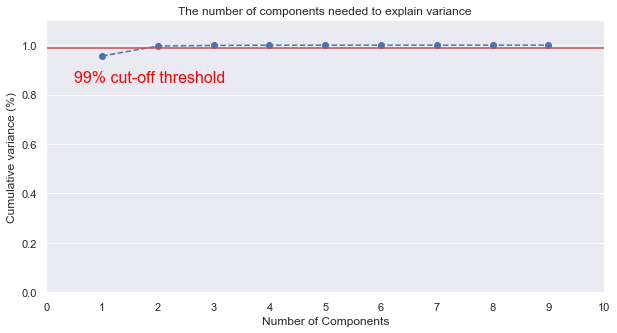

In [79]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_norm.drop('target', 1))


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [80]:
names=df_norm['target']

Variance Ratio:  [0.30318617 0.19659905 0.12660399 0.09822238 0.07957188 0.06270349
 0.05120882 0.0450585 ]


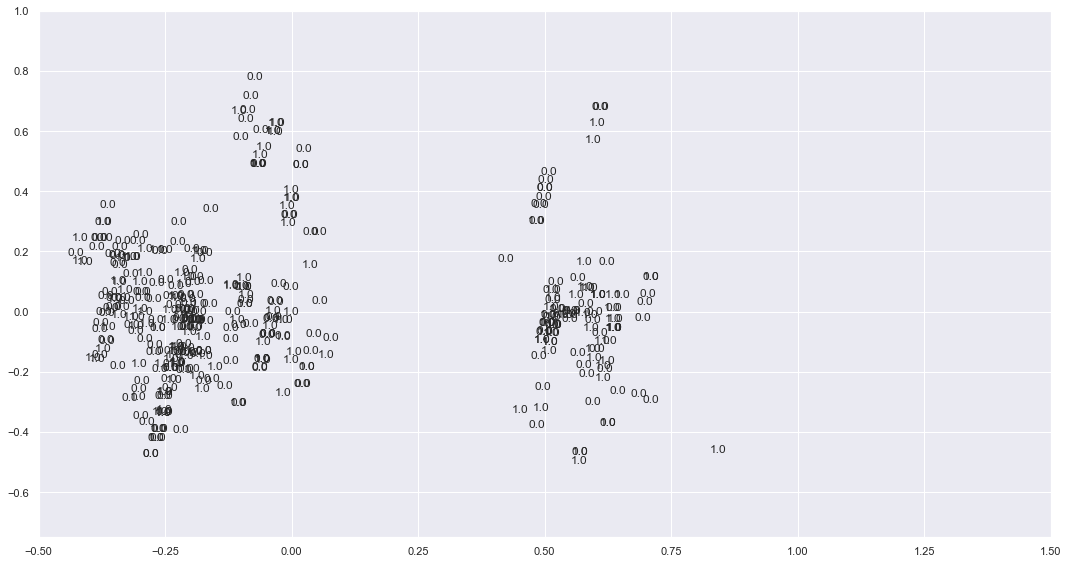

In [81]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 8)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][2], names[i]) 


plt.xlim(-0.5, 1.5)
plt.ylim(-0.75, 1)
ax.grid(True)
fig.tight_layout()
plt.show()

In [82]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)
minPts=10

# DBSCAN

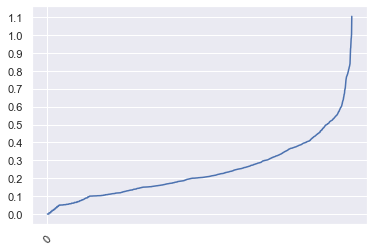

In [83]:


from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 50000, 10000))
ax.set_yticks(np.arange(0, 1.5, 0.1))

plt.plot(seq)
plt.xticks(rotation=45)

plt.show()

In [84]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.2, 0.8, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  0.20, 8, 236
  0.21, 7, 211
  0.22, 7, 197
  0.23, 7, 191
  0.24, 7, 183
  0.25, 7, 176
  0.26, 8, 160
  0.27, 8, 144
  0.28, 7, 140
  0.29, 8, 123
  0.30, 9, 110
  0.31, 9, 108
  0.32, 9, 102
  0.33, 8, 97
  0.34, 8, 94
  0.35, 8, 91
  0.36, 8, 78
  0.37, 8, 69
  0.38, 7, 62
  0.39, 7, 58
  0.40, 7, 53
  0.41, 7, 50
  0.42, 7, 45
  0.43, 7, 45
  0.44, 6, 39
  0.45, 6, 39
  0.46, 6, 27
  0.47, 5, 24
  0.48, 5, 24
  0.49, 4, 23
  0.50, 4, 20
  0.51, 3, 19
  0.52, 3, 18
  0.53, 3, 16
  0.54, 3, 13
  0.55, 3, 12
  0.56, 3, 12
  0.57, 3, 12
  0.58, 3, 11
  0.59, 3, 11
  0.60, 2, 9
  0.61, 2, 8
  0.62, 2, 8
  0.63, 2, 8
  0.64, 2, 8
  0.65, 2, 8
  0.66, 2, 8
  0.67, 1, 8
  0.68, 1, 8
  0.69, 1, 8
  0.70, 1, 7
  0.71, 1, 7
  0.72, 1, 7
  0.73, 1, 7
  0.74, 1, 7
  0.75, 1, 6
  0.76, 1, 5
  0.77, 1, 3
  0.78, 1, 3
  0.79, 1, 2
  0.80, 1, 2


In [85]:
db = DBSCAN(eps=0.60, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  1

In [86]:
labels[labels==4] = 6
labels[labels==3] = 5
labels[labels==2] = 4
labels[labels==1] = 3
labels[labels==0] = 2
labels[labels==-1] = 1




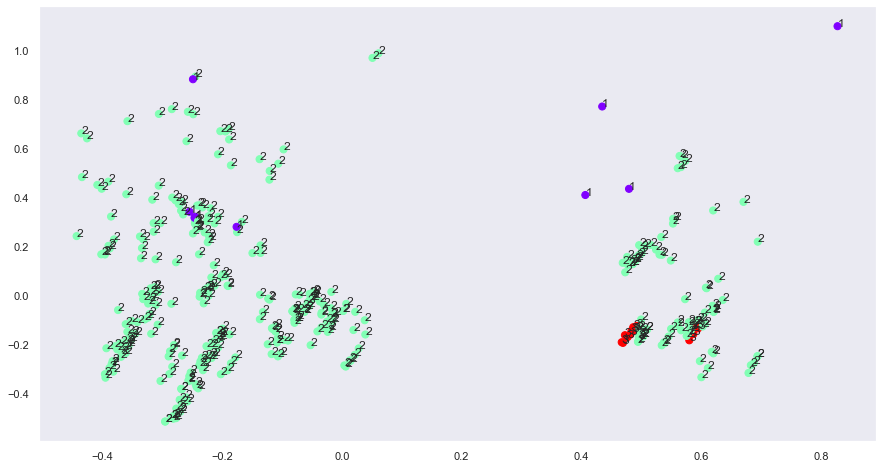

In [87]:
#plotting orginal points with color related to label
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], labels[i]) 
plt.grid()
plt.show()

In [88]:
df_norm['DBSCAN_cluster']= labels

# KMEANS

C:\Users\Practicas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


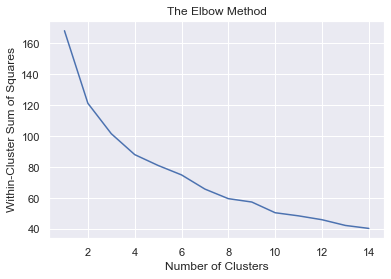

In [89]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=123)
    kmeans.fit(features_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [90]:
clusterer = KMeans(n_clusters=4, random_state=123)
cluster_labels = clusterer.fit_predict(features_norm)
print(cluster_labels)

[2 2 2 2 3 2 3 2 2 2 3 3 2 2 2 3 2 3 3 3 2 3 3 3 2 2 1 2 3 2 2 3 3 3 1 1 3
 3 3 3 3 3 3 2 1 2 2 0 2 3 3 2 2 2 2 3 3 3 2 0 3 2 0 3 3 1 1 1 3 3 0 3 2 3
 2 1 3 1 2 3 1 1 2 2 3 2 2 3 2 2 2 2 2 1 2 2 1 2 1 2 2 3 2 2 3 2 3 3 3 2 1
 3 2 3 3 1 3 2 0 3 0 0 3 2 2 2 2 2 2 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2
 3 0 3 0 0 0 0 0 0 2 2 1 2 1 0 0 0 0 0 1 0 2 2 2 3 2 3 0 0 2 0 0 0 0 2 0 1
 0 3 2 1 2 3 3 0 0 1 2 2 2 1 2 2 2 1 2 2 0 2 3 0 1 1 3 2 0 0 2 2 3 2 2 2 2
 2 1 2 1 3 1 2 2 2 2 1 2 1 2 2 2 1 2 3 0 2 0 0 2 0 1 0 0 2 0 2 2 2 0 1 3 2
 1 2 2 3 2 2 1 2 0 2 3 3 2 0 2 1 0 2 3 2 3 3 3 3 2 2 2 3 2 0 3 3 0 2 1 2 2
 0 2 2 0 3 3 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 3 3 2 0 0 0 2 2 2 2 2 3 2 3
 2 3 0 2 2 2 2 3 3 3 2 2 2 3 3 0 2 3 2 3 2 0 3 3 2 0 1 3 2 3 2 0 0 1 1 2 0
 1 2 2 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 0 0 2 3 0 2 1 0 3]


For n_clusters = 2 The average silhouette_score is : 0.32302293726312525
For n_clusters = 3 The average silhouette_score is : 0.2861099949367287
For n_clusters = 4 The average silhouette_score is : 0.308822351943037
For n_clusters = 5 The average silhouette_score is : 0.30953181161542287
For n_clusters = 6 The average silhouette_score is : 0.32696381242927824


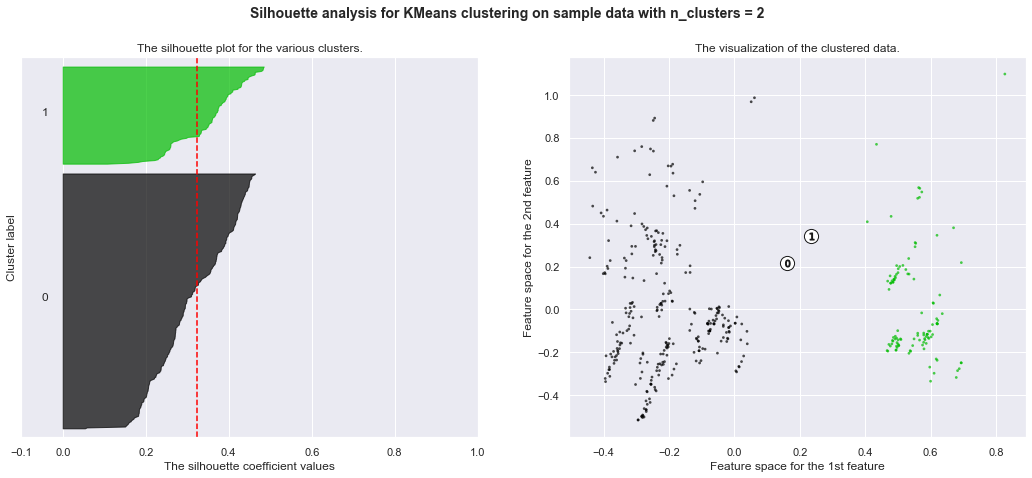

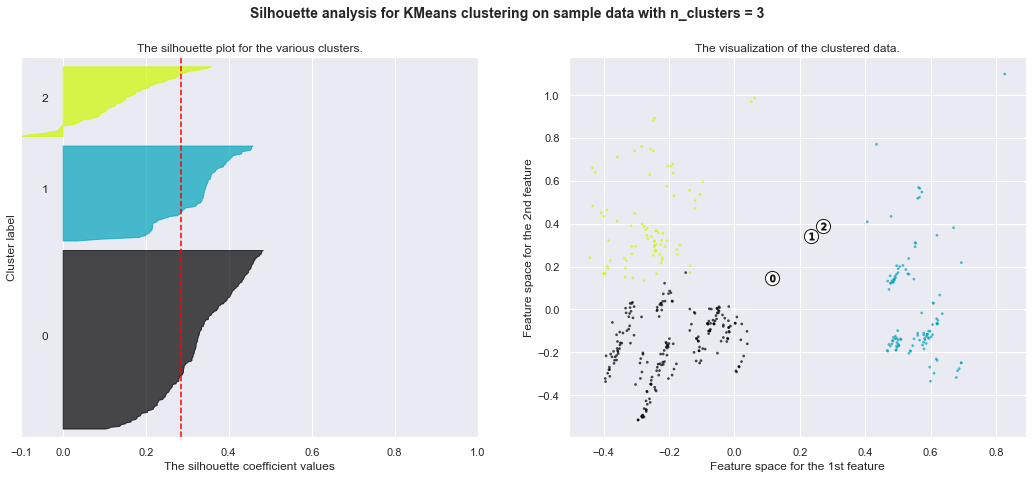

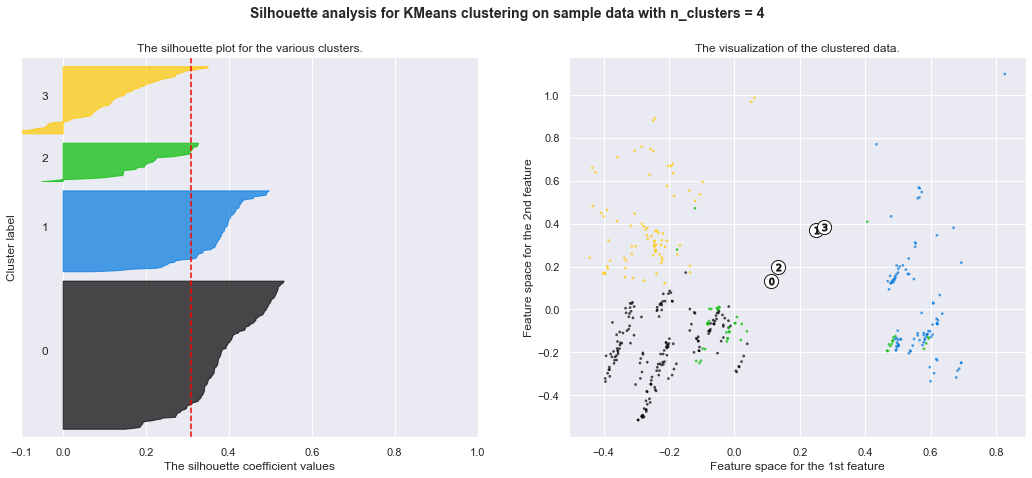

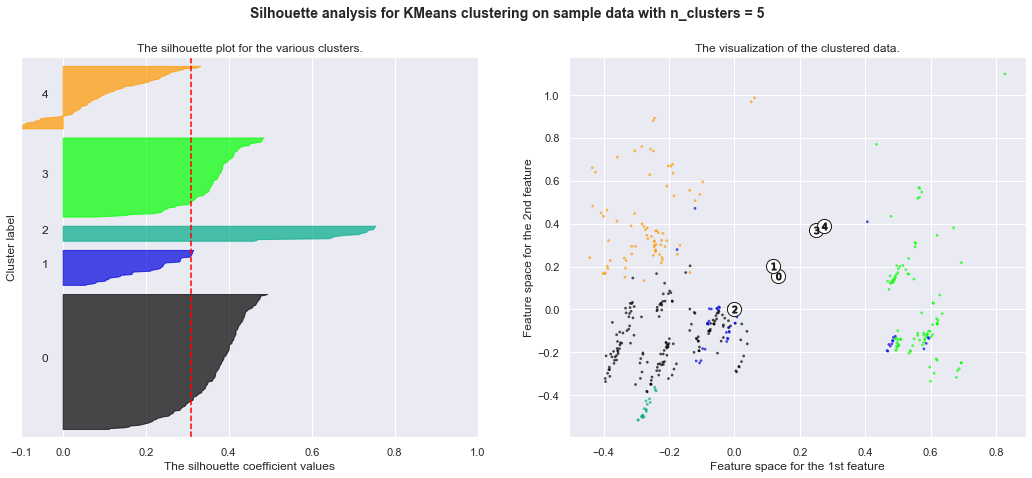

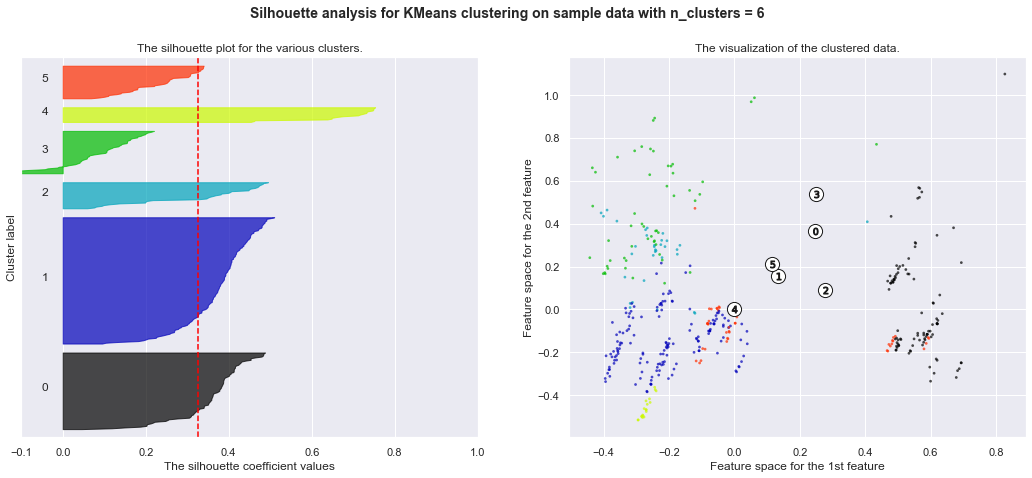

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

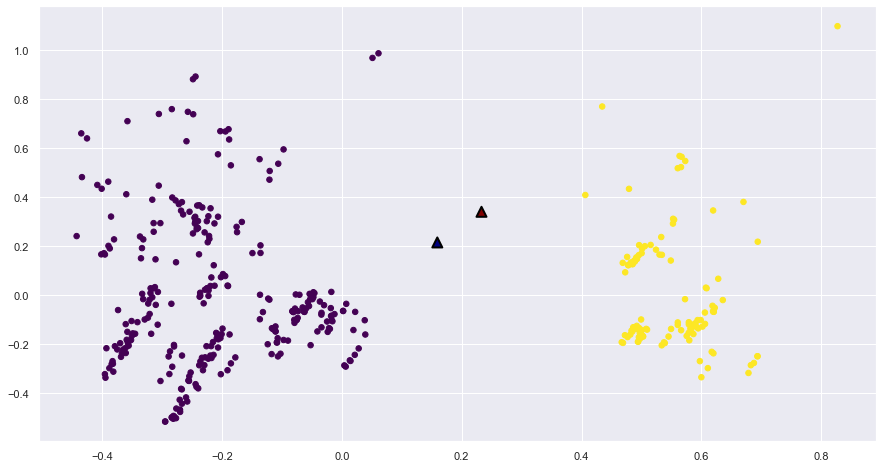

In [92]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1],#2,3,4,5],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")



In [93]:
df_norm['Kmeans_cluster']= labels

<AxesSubplot:>

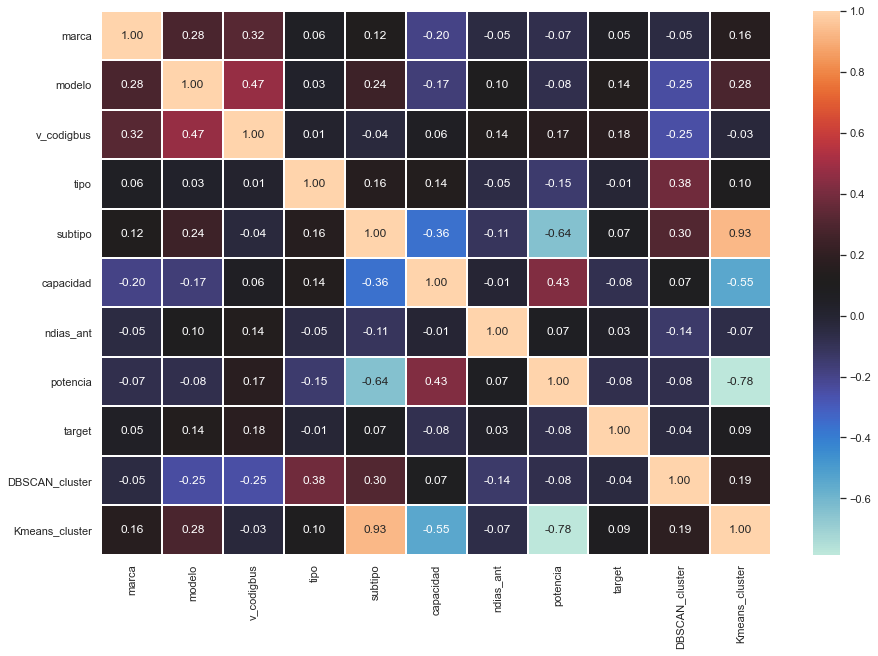

In [94]:
f,ax=plt.subplots(figsize=(15,10))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

In [95]:
df_feat = np.transpose(df_norm)
df_feat=df_feat.drop('target', 0)

In [96]:
names =  df_feat.index
names

Index(['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo',
       'capacidad', 'ndias_ant', 'potencia', 'DBSCAN_cluster',
       'Kmeans_cluster'],
      dtype='object')

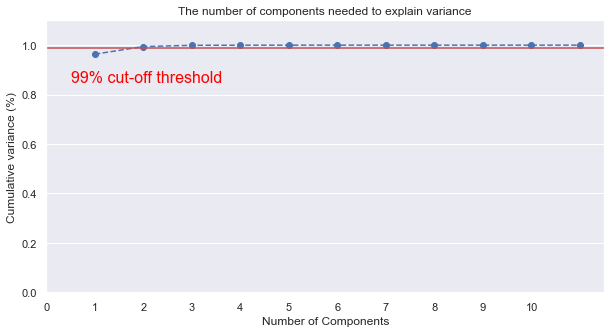

In [97]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.84146848 0.11889377]


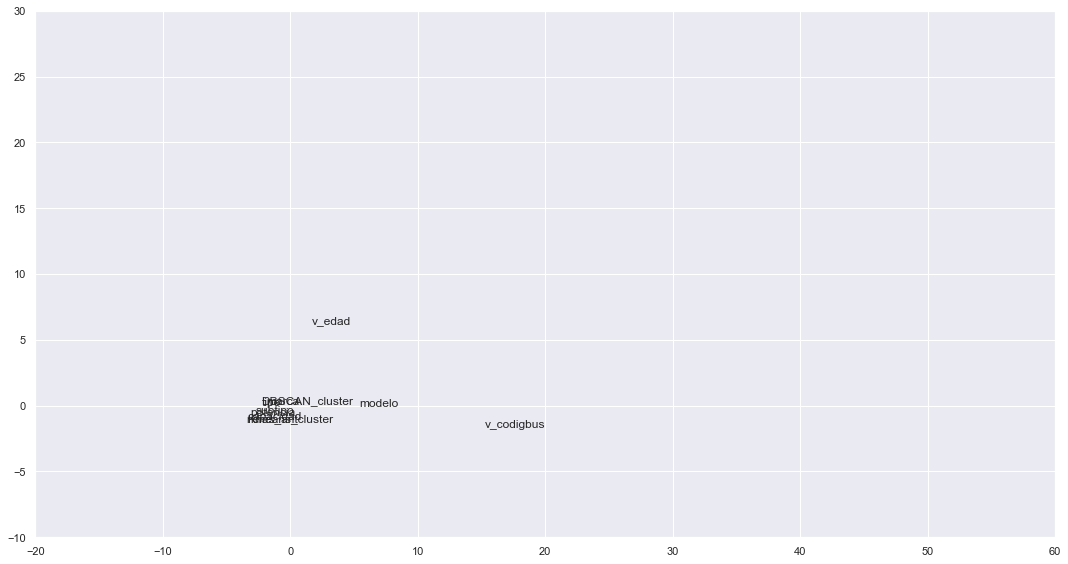

In [98]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, 60)
plt.ylim(-10, 30)
ax.grid(True)
fig.tight_layout()
plt.show()

In [99]:
df_norm

,marca,modelo,v_codigbus,tipo,v_edad,subtipo,capacidad,ndias_ant,potencia,target,DBSCAN_cluster,Kmeans_cluster
0,2,2,2,2,4,1,0.208861,0.094595,0.832215,1.0,2,0
1,1,2,6,2,4,1,0.310127,0.027027,0.802013,1.0,2,0
2,1,1,5,1,7,1,0.436709,0.114865,0.557047,1.0,2,0
3,1,1,1,1,7,1,0.436709,0.094595,0.557047,1.0,2,0
4,4,6,8,2,3,2,0.069620,0.202703,0.100671,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,47,100,2,0,1,0.316456,0.027027,0.879195,0.0,2,0
393,3,5,7,2,15,1,0.316456,0.000000,0.731544,0.0,2,0
394,5,8,11,3,7,1,0.170886,0.027027,0.630872,0.0,2,0
395,5,45,95,2,15,1,0.316456,0.331081,0.828859,0.0,2,0


In [100]:
df_norm.columns

Index(['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo',
       'capacidad', 'ndias_ant', 'potencia', 'target', 'DBSCAN_cluster',
       'Kmeans_cluster'],
      dtype='object')

test=df_n.to_numpy()
test

In [101]:
features=['target', 'modelo', 'v_codigbus', 'v_edad', 'capacidad','marca','Kmeans_cluster']
#['marca', 'modelo', 'v_codigbus', 'tipo', 'v_edad', 'subtipo','capacidad', 'ndias_ant', 'potencia', 'target']
            
new_df=df_norm[features]


In [102]:
 new_df[features] =  new_df[features].astype('int')

C:\Users\Practicas\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# SPLIT TRAIN MODEL

### Validación cruzada

In [103]:
from sklearn.model_selection import KFold

In [104]:
cv = KFold(n_splits = 10, shuffle = False) # 

### Split dataset

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
                                        new_df.drop(columns = "target"),
                                        #new_df,
                                        new_df['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [106]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
                                        new_df,
                                        new_df['target'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [108]:
train=X_train_c
train.reset_index(drop = True, inplace = True)
round((train.isnull().sum()/len(train))*100,2)

target            0.0
modelo            0.0
v_codigbus        0.0
v_edad            0.0
capacidad         0.0
marca             0.0
Kmeans_cluster    0.0
dtype: float64


# ************************   MODELADO    ********************


# RANDOM FOREST CLASSIFIER
## RandomizedSearch

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer,accuracy_score

In [110]:
RF=RandomForestClassifier(random_state=0)

In [506]:
'''    
parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': np.arange(10,150,1),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(30,150,5)
            }
'''
parameters_ran={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': np.arange(70,120,1),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,10,1),
               'max_features':['auto', 'sqrt', 'log2'],
               'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(70,120,1)
            }
         

In [598]:
ran_rf=RandomizedSearchCV(RF,parameters_ran,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=20,n_iter=1000) 
ran_rf.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators="class_weight='balanced_subsample', "
                                                                 'max_depth=103,\n'
                                                                 '                       '
                                                                 "max_features='sqrt', "
                                                                 'min_samples_leaf=3,\n'
                                                                 '                       '
                                                                 'min_samples_split=9, '
                                                                 'n_estimators=85, '
                                                                 'random_state=0'),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['b

In [556]:
ran_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=97,
                       max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=74, random_state=0)

In [597]:
print("Best parameters from Randomsearch: {}".format(ran_rf.best_params_))
print("CV score=%0.4f" % ran_rf.best_score_)
cv_results = ran_rf.cv_results_

Best parameters from Randomsearch: {'n_estimators': 85, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 103, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}
CV score=0.6501


In [563]:
print("Best parameters from Randomsearch: {}".format(ran_rf.best_params_))
print("CV score=%0.4f" % ran_rf.best_score_)
cv_results = ran_rf.cv_results_

Best parameters from Randomsearch: {'n_estimators': 85, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 103, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}
CV score=0.650


In [599]:
print("Best parameters from Randomsearch: {}".format(ran_rf.best_params_))
print("CV score=%0.4f" % ran_rf.best_score_)
cv_results = ran_rf.cv_results_

Best parameters from Randomsearch: {'n_estimators': 73, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 73, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
CV score=0.6601


In [365]:
target.upper()

'SISTEMA DE ESCAPE'

# NOTIFICACIÓN DE PROCESO TERMINADO

In [600]:
# NOTIFICACIÓN DE PROCESO TERMINADO
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'RandomSearch Random Forest: '+'\n'
              + str(ran_rf.best_params_)+'\n'+'Best Score :%0.4f' % ran_rf.best_score_)

#enviarDocumento(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
    
sound=vlc.MediaPlayer(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()


In [111]:
ran_rf.best_estimator_

NameError: name 'ran_rf' is not defined

In [112]:
'''
parameters_grid={'bootstrap': [True],
               'criterion':['gini'],
               'max_depth': np.arange(60,90,1),
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(5,10,1),
               'max_features':['auto', 'sqrt'],
               'class_weight':['balanced','balanced_subsample'],
               'n_estimators':np.arange(70,120,1)
            }
'''
parameters_grid={'bootstrap': [True],
               'criterion':['gini'],
               'max_depth': np.arange(65,80,1),
               'max_features': ['auto'],
               'min_samples_leaf': [3],
               'min_samples_split': [6],
               'max_features':['sqrt'],
               'class_weight':['balanced'],
               'n_estimators': np.arange(65,80,1)
            }


In [113]:
grid_rf = GridSearchCV(RF,parameters_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'criterion': ['gini'],
                         'max_depth': array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                         'max_features': ['sqrt'], 'min_samples_leaf': [3],
                         'min_samples_split': [6],
                         'n_estimators': array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])},
             scoring='accuracy', verbose=1)

In [609]:
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print("CV score=%0.3f" % grid_rf.best_score_)
cv_results = grid_rf.cv_results_

Best parameters from gridsearch: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 111}
CV score=0.653


In [114]:
print("Best parameters from gridsearch: {}".format(grid_rf.best_params_))
print("CV score=%0.3f" % grid_rf.best_score_)
cv_results = grid_rf.cv_results_

Best parameters from gridsearch: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 65, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 66}
CV score=0.640


In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(X_test_t)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X_test_t)

In [120]:
X_test_t['Kmeans_cluster']= labels
X_test_t=X_test_t[features]
X_test_t=X_test_t.drop('target', 1)

C:\Users\PRACTI~1\AppData\Local\Temp/ipykernel_10308/987311369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_t['Kmeans_cluster']= labels


In [121]:
X_test_t.columns

Index(['modelo', 'v_codigbus', 'v_edad', 'capacidad', 'marca',
       'Kmeans_cluster'],
      dtype='object')

In [604]:
ran_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=73,
                       max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=6, n_estimators=73)

In [124]:
# constructor
test=X_test
RF = RandomForestClassifier(random_state=0,bootstrap= True,
                               class_weight='balanced',
                               criterion='gini',
                               max_depth=60,
                               max_features='auto',
                               min_samples_leaf=3,
                               min_samples_split=8,
                               n_estimators=111)

#Predicción
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test_t)
acc = accuracy_score(y_test_t, y_pred)
print ('Accuracy: ', acc)

#Salida
output = pd.DataFrame({ 'date': X_test_t.index,'Real': y_test_t, 'Predicho': y_pred})

Accuracy:  0.7000636357208513


In [126]:
print('DECISION TREE CLASSIFIER \n')
print(classification_report(y_test_t, y_pred))

DECISION TREE CLASSIFIER 

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82     14143
         1.0       0.00      0.00      0.00         0

    accuracy                           0.70     14143
   macro avg       0.50      0.35      0.41     14143
weighted avg       1.00      0.70      0.82     14143



C:\Users\Practicas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Practicas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Practicas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# constructor
test=X_test
RF = RandomForestClassifier(random_state=0,bootstrap= True,
                               class_weight='balanced',
                               criterion='gini',
                               max_depth=60,
                               max_features='auto',
                               min_samples_leaf=3,
                               min_samples_split=8,
                               n_estimators=111)

#Predicción
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('Accuracy: ', acc)

#Salida
output = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})

Accuracy:  0.55


In [128]:
print('DECISION TREE CLASSIFIER \n')
print(classification_report(y_test, y_pred))

DECISION TREE CLASSIFIER 

              precision    recall  f1-score   support

           0       0.58      0.61      0.59        54
           1       0.51      0.48      0.49        46

    accuracy                           0.55       100
   macro avg       0.55      0.54      0.54       100
weighted avg       0.55      0.55      0.55       100



In [610]:
# NOTIFICACIÓN DE PROCESO TERMINADO
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'GridSearch Random Forest: '+'\n'+
              str(grid_rf.best_params_)+'\n'+'Best Score :%0.4f' % grid_rf.best_score_)

#enviarDocumento(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
    
sound=vlc.MediaPlayer(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()

# SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC # "Support vector classifier"
from scipy import stats


svc = SVC(probability = True, random_state = 0)
svc

'''
parameters_ran_svc={'C': np.arange(0.1, 2, 0.2),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.1, 1, 0.2),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['dict','balanced', 'None']
                   }

parameters_ran_svc={'C': np.arange(0.6, 1, 0.02),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    "gamma": np.arange(0.6, 1, 0.02),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['dict','balanced', 'None']
                   }
'''
parameters_ran_svc={'C': np.arange(0.1, 2, 0.2),
                    'kernel': [ 'poly', 'sigmoid','rbf','linear'], #'precomputed'],
                    #'coef0':np.arange(0.2, 0.8, 0.01),
                    'degree':np.arange(2, 5,1),
                    "gamma": np.arange(0.1, 1, 0.2),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['balanced']
                   }
'''
parameters_ran_svc={'C': np.arange(0.68, 0.8, 0.01),
                    'kernel': [ 'poly', 'sigmoid','rbf','linear',], #'precomputed'],
                    #'coef0':np.arange(0.2, 0.8, 0.01),
                    'degree':np.arange(2, 5,1),
                    "gamma": np.arange(0.6, 0.8, 0.01),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['balanced']
                   }
'''
 

ran_svc=RandomizedSearchCV(svc,parameters_ran_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0) 
ran_svc.fit(X_train,y_train)

print("Best parameters from Randomsearch: {}".format(ran_svc.best_params_))
print("CV score=%0.3f" % ran_svc.best_score_)
cv_results = ran_svc.cv_results_

print("Best parameters from Randomsearch: {}".format(ran_svc.best_params_))
print("CV score=%0.3f" % ran_svc.best_score_)
cv_results = ran_svc.cv_results_

parameters_grid_svc={'C': np.arange(0.75, 0.9, 0.01),
                    #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
                    'degree':np.arange(2, 5,1)
                    "gamma": np.arange(0.6, 0.7, 0.01),
                    'decision_function_shape':['ovo','ovr'],
                    'class_weight': ['balanced']
                   }


grid_svc = GridSearchCV(svc,parameters_grid_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_svc.fit(X_train,y_train)

sound=vlc.MediaPlayer(r'C:\Users\Practicas\Documents\Prediccion talleres\sounds\wavs_conga_groove.wav')
sound.play()

print("Best parameters from gridsearch: {}".format(grid_svc.best_params_))
print("CV score=%0.3f" % grid_svc.best_score_)
cv_results = grid_svc.cv_results_

# constructor
test=X_test
svc = SVC(probability = True, random_state = 0,
          C=0.85 ,
          gamma= 0.69,
          decision_function_shape='ovo',
          class_weight='balanced')

#Predicción
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('Accuracy: ', acc)

#Salida
output_svr = pd.DataFrame({ 'date': X_test.index,'Real': y_test, 'Predicho': y_pred})

print('DECISION TREE CLASSIFIER \n')
print(classification_report(y_test, y_pred))